In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3048952140c217a651e6568a04441f08


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3048952140c217a651e6568a04441f08&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":58.26,"feels_like":50.2,"temp_min":53.01,"temp_max":62.01,"pressure":1023,"humidity":44},"visibility":10000,"wind":{"speed":9.22,"deg":120},"clouds":{"all":100},"dt":1616606067,"sys":{"type":1,"id":4967,"country":"US","sunrise":1616582406,"sunset":1616626836},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.26,
  'feels_like': 50.2,
  'temp_min': 53.01,
  'temp_max': 62.01,
  'pressure': 1023,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 120},
 'clouds': {'all': 100},
 'dt': 1616606067,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1616582406,
  'sunset': 1616626836},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 62.01 44 100 9.22


In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
#date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nuevo progreso
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | lac du bonnet
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | kovylkino
Processing Record 13 of Set 1 | sunndalsora
Processing Record 14 of Set 1 | sakakah
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | kodinsk
Processing Record 20 of Set 1 | tazovskiy
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | inhambane
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | akdepe
Processing Record 40 of Set 4 | half moon bay
Processing Record 41 of Set 4 | boende
Processing Record 42 of Set 4 | nokha
Processing Record 43 of Set 4 | alofi
Processing Record 44 of Set 4 | trairi
Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | emerald
Processing Record 47 of Set 4 | navahrudak
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | nome
Processing Record 2 of Set 5 | surgut
Processing Record 3 of Set 5 | gornopravdinsk
Processing Record 4 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 5 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | mandali
Processing Record 9 of Set 5 | saint

Processing Record 26 of Set 8 | havre-saint-pierre
Processing Record 27 of Set 8 | shenjiamen
Processing Record 28 of Set 8 | olafsvik
Processing Record 29 of Set 8 | novikovo
Processing Record 30 of Set 8 | altay
Processing Record 31 of Set 8 | florianopolis
Processing Record 32 of Set 8 | manicore
Processing Record 33 of Set 8 | fairview
Processing Record 34 of Set 8 | yenotayevka
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | bideford
Processing Record 37 of Set 8 | gueugnon
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | sidney
Processing Record 40 of Set 8 | makakilo city
Processing Record 41 of Set 8 | leningradskiy
Processing Record 42 of Set 8 | ukhta
Processing Record 43 of Set 8 | estelle
Processing Record 44 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 45 of Set 8 | labuhan
Processing Record 46 of Set 8 | xingyi
Processing Record 47 of Set 8 | puerto colombia
Processing Record 48 of Set 8 | clovi

Processing Record 14 of Set 12 | klyuchi
Processing Record 15 of Set 12 | salalah
Processing Record 16 of Set 12 | prince rupert
Processing Record 17 of Set 12 | danielskuil
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | chapais
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | wukari
Processing Record 22 of Set 12 | lingao
Processing Record 23 of Set 12 | trincomalee
Processing Record 24 of Set 12 | bolobo
Processing Record 25 of Set 12 | vostok
Processing Record 26 of Set 12 | darhan
Processing Record 27 of Set 12 | purpe
Processing Record 28 of Set 12 | marechal candido rondon
Processing Record 29 of Set 12 | urcos
Processing Record 30 of Set 12 | sao miguel do araguaia
Processing Record 31 of Set 12 | sarkand
Processing Record 32 of Set 12 | bilma
Processing Record 33 of Set 12 | sao filipe
Processing Record 34 of Set 12 | rio rancho
Processing Record 35 of Set 12 | manitouwadge
Processing Record 36 of Set 12 | kununurra
Proc

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nuevo Progreso,23.1667,-97.9500,93.00,64,8,11.01,MX,2021-03-24 17:18:21
1,Butaritari,3.0707,172.7902,81.99,77,45,20.29,KI,2021-03-24 17:16:09
2,Saint-Philippe,-21.3585,55.7679,80.60,78,75,3.44,RE,2021-03-24 17:18:22
3,Qaqortoq,60.7167,-46.0333,24.80,39,75,3.44,GL,2021-03-24 17:18:22
4,Hasaki,35.7333,140.8333,52.00,81,75,6.91,JP,2021-03-24 17:16:35
5,Vaini,-21.2000,-175.2000,77.00,94,90,9.22,TO,2021-03-24 17:18:22
6,Lac Du Bonnet,50.2536,-96.0612,23.00,99,100,8.99,CA,2021-03-24 17:18:23
7,Cayenne,4.9333,-52.3333,87.80,58,19,13.80,GF,2021-03-24 17:18:23
8,Puerto Ayora,-0.7393,-90.3518,82.99,83,40,6.91,EC,2021-03-24 17:16:13
9,Jamestown,42.0970,-79.2353,63.00,82,90,16.02,US,2021-03-24 17:15:36


In [18]:
# rearrange the column
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nuevo Progreso,MX,2021-03-24 17:18:21,23.1667,-97.9500,93.00,64,8,11.01
1,Butaritari,KI,2021-03-24 17:16:09,3.0707,172.7902,81.99,77,45,20.29
2,Saint-Philippe,RE,2021-03-24 17:18:22,-21.3585,55.7679,80.60,78,75,3.44
3,Qaqortoq,GL,2021-03-24 17:18:22,60.7167,-46.0333,24.80,39,75,3.44
4,Hasaki,JP,2021-03-24 17:16:35,35.7333,140.8333,52.00,81,75,6.91
...,...,...,...,...,...,...,...,...,...
557,Tabou,CI,2021-03-24 17:20:30,4.4230,-7.3528,82.89,75,91,11.39
558,Huarmey,PE,2021-03-24 17:20:30,-10.0681,-78.1522,76.77,70,70,10.47
559,Port Macquarie,AU,2021-03-24 17:19:05,-31.4333,152.9167,61.00,99,0,1.99
560,Aguimes,ES,2021-03-24 17:20:30,27.9054,-15.4461,73.40,53,0,4.61


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

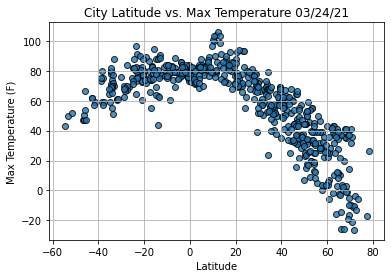

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

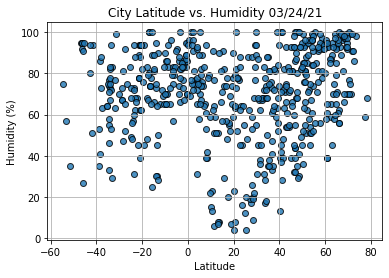

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

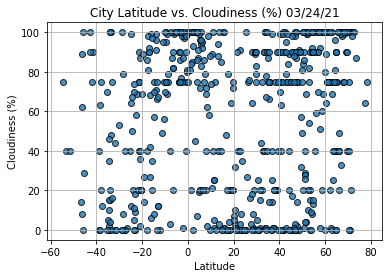

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

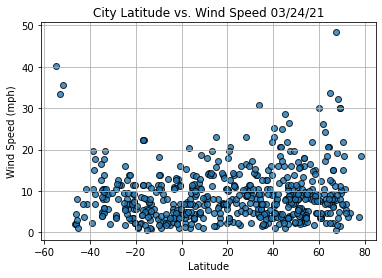

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()